'''''
{
"title": "Data-Preprocessing-Checklist",
"keywords": "DataPreprocessing, ",
"categories": "",
"description": "Hier geht es um die individuelle Abarbeitung der <em>EDA</em>-Checkliste im Kontext der California-Housing Problematik",
"level": "30",
"pageID": "16112020-10-California-Housing-Data-Preprocessing-Checklist"
}
'''''

<center><h1>California Housing <br> Data Preprocessing</h1></center>

![](imgs/2020-11-14-21-31-19.png)

In diesem Notebook wird die [EDA-Checkliste](16112020-EDA-Checklite) im Kontext des California-Housing Problem abgeabreitet. Bei dieser Checkliste geht es darum, die Datenstruktur grundlegend zu verstehen. Hier werden die Daten lediglich beschrieben, das ist wichtig bevor die Modellierung startet.

# Laden der Daten
Die Daten wurden bereits im vorherigen [Notebook - California Housing Priceses Data](14112020-10-California-Housing-Data) gesplittet und persistent auf der Festplatte gespeichert. Somit müssen diese Daten in diesem Notebook zunächst geladen werden. Die Funktion Daten-Laden wurde in diesem Notebook der übersichtlichkeit wegen ebenfalls ausgelagert.

In [1]:
# To support both python 2 and python 3

import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np

import FunctionFileCalifornia as ffc

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Basic Variables
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

.\images\end_to_end_project


In [2]:
housing = ffc.load_housing_data()
strat_test_set = ffc.load_housing_data(filename="strat_test_set.csv")
strat_train_set = ffc.load_housing_data(filename="strat_train_set.csv")
#print(housing.shape, strat_test_set.shape, strat_train_set.shape)
#print(strat_test_set.head(5))

# Vertikaler Cut
Im vorherigen [horizontalen Cut](14112020-10-California-Housing-Data) wurden die Trainings und Testdaten erstellt und auf der Festplatte gepseichert. In dem Vertikalen Cut werden nun die Trainings und Testdaten in jeweils beschreibende und zu erklärende Variable aufgeteilt = Supervised Learning.

In [3]:
print(strat_train_set.shape)
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()
print(housing.shape)
print(housing_labels.shape)

(16512, 12)
(16512, 11)
(16512,)


# [1. Data-Cleaning - NAN-Values](07112020200718-DataCleaning)
Aus dem [Data-Management-Notebook](14112020-10-California-Housing-Data) ist klar, dass NAN/0/"" Werte in dem Feature "total bedrooms" existieren. Diese Werte werden nun in dieser Rubrik behandelt. 

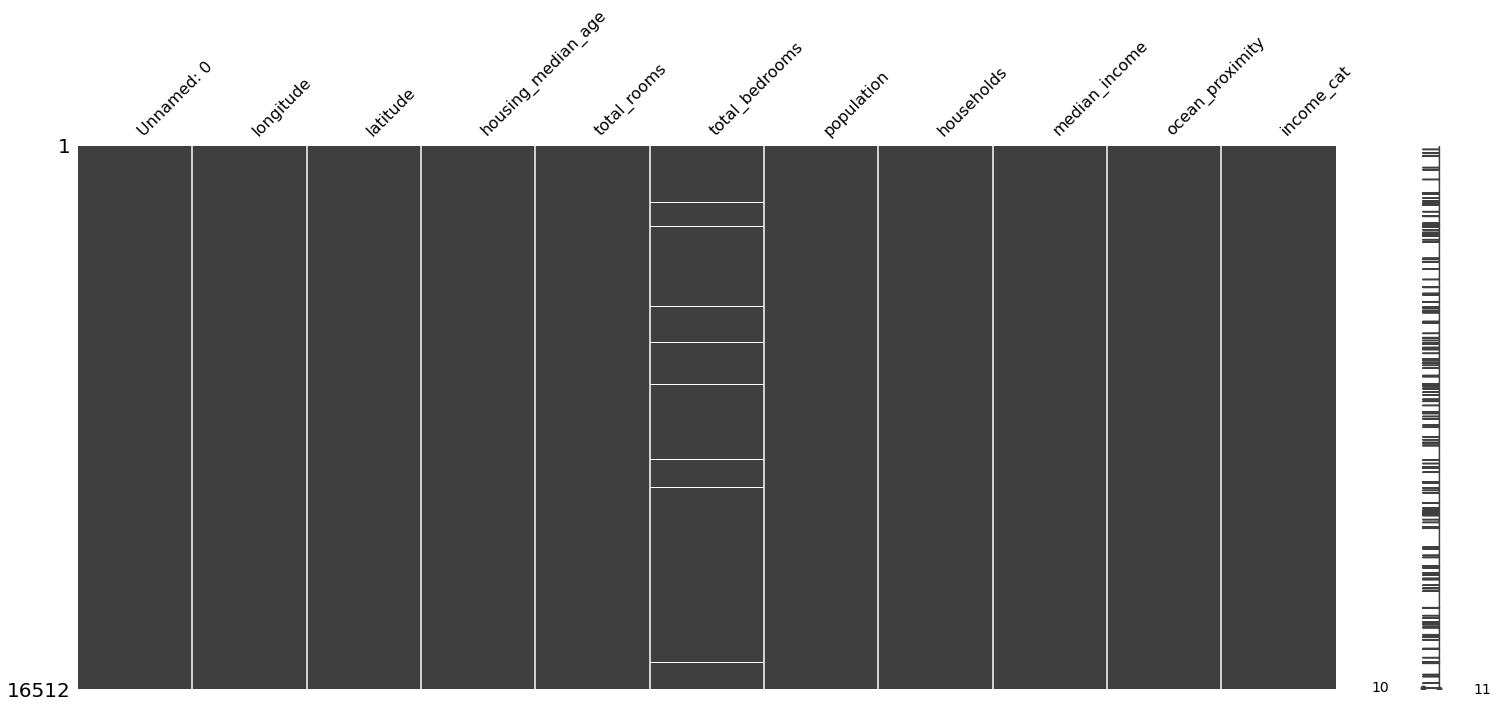

In [4]:
import missingno as msno
msno.matrix(housing)

In [5]:
print(housing.isnull().any())
print(housing.dtypes)

Unnamed: 0            False
longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
income_cat            False
dtype: bool
Unnamed: 0              int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
income_cat              int64
dtype: object


## Imputation
In dieser Lösung entscheide ich mich dazu eine Imputaion durchzuführen. Ander Lösungen finden sich in diesem [Notebook](16112020-NAWerte).

In [6]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer
imputer = SimpleImputer(strategy="median")
# erstellen eines Sub-DF welches nur die numerischen Werte beinhaltet
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
# imputer.statistics_
# housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [7]:
print(housing_tr.shape)
#print(housing_tr.isnull().any())

print(housing.shape)
#print(housing.isnull().any())


(16512, 10)
(16512, 11)


# [2. Feature-Selection](07112020200718-FeatureSelection)
Im konkreten Beispiel verwende ich alle gegebenen Feature des Datensatzes 

# [3. Feature-Engineering](07112020200718-FeatureEngineering)

## One Hot Encoding
für die kategorischen Variablen check out das [OHE-Notebook](16112020-OneHotEncodingOrdinalEncoding)

In [8]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

In [9]:
housing_cat = housing[['ocean_proximity']]
housing_cat.shape
cat_encoder = OneHotEncoder(sparse=False)
housing_ocean_proximity_cat_1hot = cat_encoder.fit_transform(housing_cat)
titles = cat_encoder.get_feature_names(['ocean_proximity'])
partOHEdf = pd.DataFrame(housing_ocean_proximity_cat_1hot, columns=titles)
print(partOHEdf.shape)

(16512, 5)


# Zusammenfügen des OHE & Imputer DF

In [10]:
housingDF = pd.concat([housing_tr,partOHEdf],axis=1)
print(housingDF.shape)
print(housingDF.head(5))

(16512, 15)
   Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0     17606.0    -121.89     37.29                38.0       1568.0   
1     18632.0    -121.93     37.05                14.0        679.0   
2     14650.0    -117.20     32.77                31.0       1952.0   
3      3230.0    -119.61     36.31                25.0       1847.0   
4      3555.0    -118.59     34.23                17.0       6592.0   

   total_bedrooms  population  households  median_income  income_cat  \
0           351.0       710.0       339.0         2.7042         2.0   
1           108.0       306.0       113.0         6.4214         5.0   
2           471.0       936.0       462.0         2.8621         2.0   
3           371.0      1460.0       353.0         1.8839         2.0   
4          1525.0      4459.0      1463.0         3.0347         3.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        1.0                    

In [11]:
# Feature Creation

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [13]:
print(housing_extra_attribs.shape)

(16512, 13)


# [4. Feature Scaling](07112020200718-FeatureScaling)
wichtig ist, dass die Skalierungen später(nach den Predictions) wieder zurück skaliert werden.

In [14]:
housingDF.dtypes

Unnamed: 0                    float64
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
income_cat                    float64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#print(housing_tr)
scaler.fit(housingDF)
housing_tr_scaled = scaler.transform(housingDF)

In [16]:
print(housing_tr_scaled.shape)
#print(houhousingDF.colsing_tr_scaled)
titles = housingDF.columns
finalPreporcessedDF = pd.DataFrame(housing_tr_scaled, columns=titles)
print(finalPreporcessedDF.shape)
print(finalPreporcessedDF.head(1))

(16512, 15)
(16512, 15)
   Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0    0.853087    0.24502  0.504782             0.72549     0.039731   

   total_bedrooms  population  households  median_income  income_cat  \
0        0.056218    0.019816     0.06292       0.152019        0.25   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        1.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  


# [5. SK-Learn Pipeline](07112020200718-FeatureScaling)
Die oberen Schritte waren bisher primär für die Entwicklung. Für einen vernünftigen Einsatz werden nun [SK-Learn Pipelines]() verwendet.

In [17]:
housing = ffc.load_housing_data()
strat_test_set = ffc.load_housing_data(filename="strat_test_set.csv")
strat_train_set = ffc.load_housing_data(filename="strat_train_set.csv")
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = ["ocean_proximity"]

In [18]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [19]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY,15.4951,15.1348
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY,133.231,137.085
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY,26.1802,24.3889
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY,41.6438,38.8085
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY,72.7991,67.3392


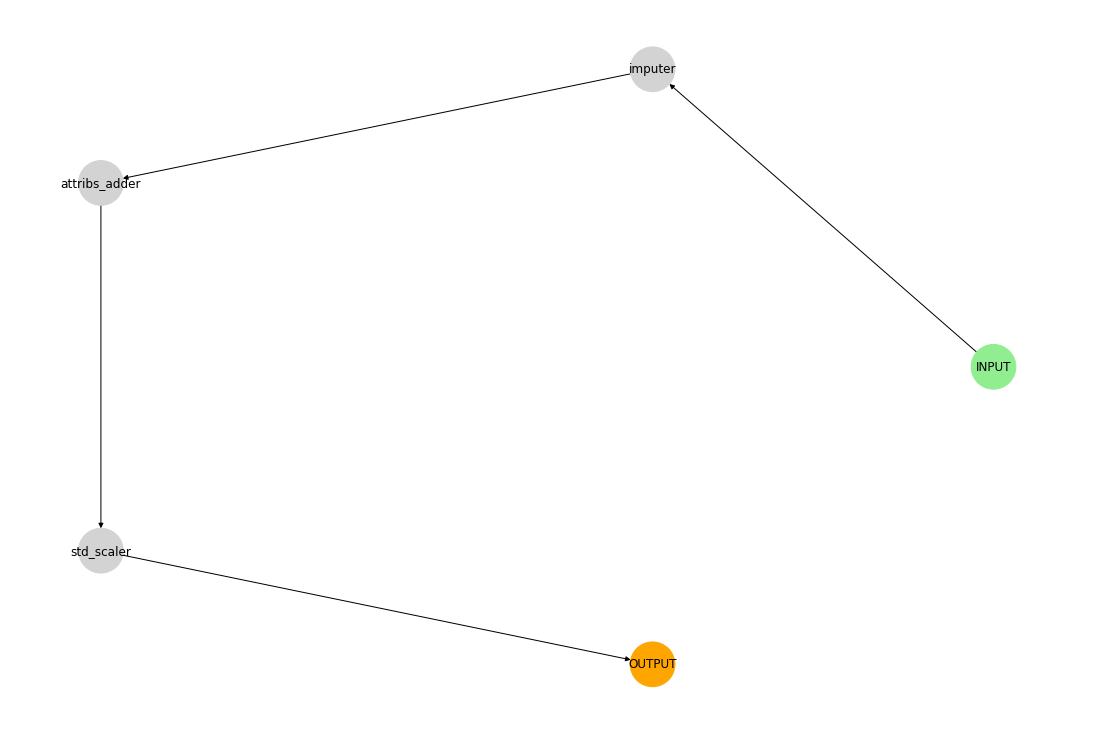

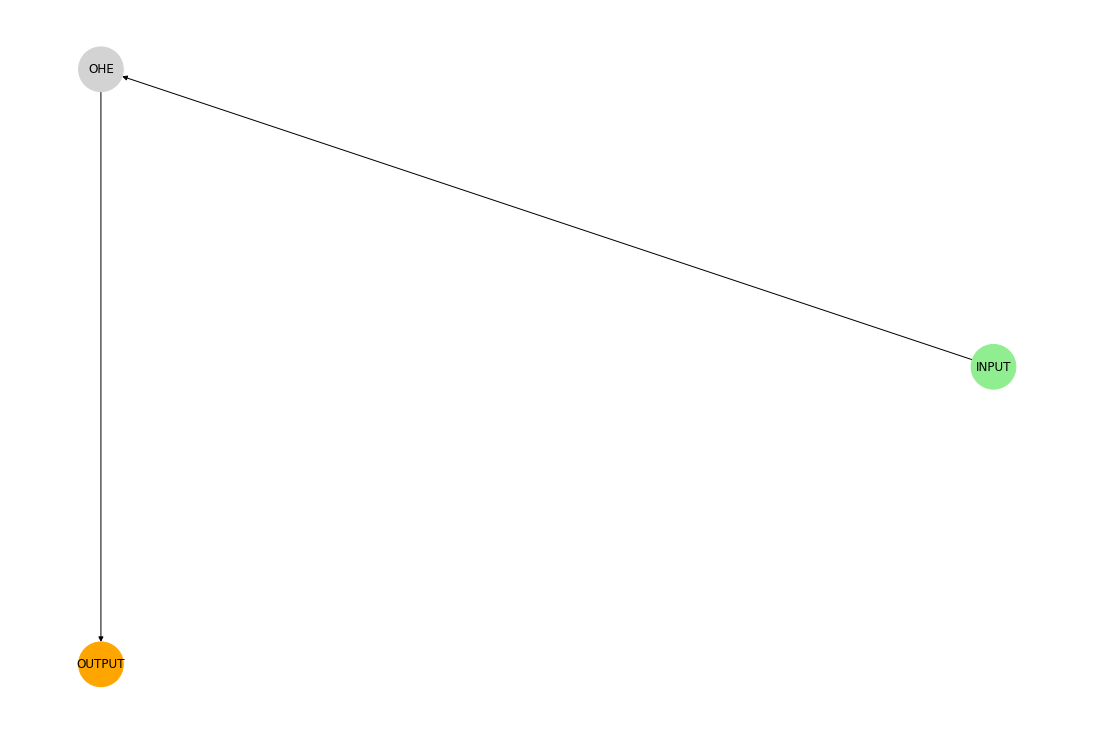

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('OHE', OneHotEncoder())
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr
from pipe_tools.pipe_visualizer import plot_pipeline
plot_pipeline(num_pipeline, "pipeline_plot.png")
plot_pipeline(cat_pipeline, "pipeline_plot.png")

In [21]:
try:
    from sklearn.compose import ColumnTransformer
    print("SK-Learn Version passt")
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
    print("Alte Version")

SK-Learn Version passt


In [25]:
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

print(housing.shape)
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
print(type(housing_prepared))

(20640, 10)
(20640, 17)
<class 'numpy.ndarray'>


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    '''Select Feature by name'''
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [29]:
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
    ])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
    ])

NameError: name 'LabelBinarizer' is not defined